<a href="https://colab.research.google.com/github/mudesir/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/mudesir_ds_unit1_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DS Unit 1 Build
# South African Heart Disease Study

Data from https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data

Description of the columns header:

1. sbp: systolic blood pressure
2. tobacco: cumulative tobacco (kg)
3. ldl: low densiity lipoprotein cholesterol
4. adiposity
5. famhist: family history of heart disease (Present,  Absent)
6. typea: type-A behavior
7. obesity
8. alcohol: current alcohol consumption
9. age: age at onset
10. chd: coronary heart disease

## Exploratory Data Analysis

In [0]:
#  loading the dataset using pandas.read_csv() and checking for the data
import pandas as pd
import numpy as np
df = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data")
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [0]:
# the column row.names is not iportant I will drop it
df = df.drop('row.names', axis=1)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [0]:
# check the null value and shape
print(df.shape)
df.isnull().sum()

(462, 10)


sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [0]:
# check data type
df.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [0]:
# the famhist data type object we have to change into number, replace "Present" to 1 
# and  "Absent" to 0
df = df.replace({'Present': 1, 'Absent':0})
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [0]:
# for clarification I rename the column headers
df = df.rename(columns={'sbc':'systolic blood pressure', 'ldl':'low density lipoprotein', 'famhist':'family history',
                   'chd':'coronary heart disease'})
df.head()

,sbp,tobacco,low density lipoprotein,adiposity,family history,typea,obesity,alcohol,age,coronary heart disease
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [0]:
# to choose the most affect variable we see the correlation 
df.corr()

,sbp,tobacco,low density lipoprotein,adiposity,family history,typea,obesity,alcohol,age,coronary heart disease
sbp,1.000000,0.212247,0.158296,0.356500,0.085645,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,0.088601,-0.014608,0.124529,0.200813,0.450330,0.299718
low density lipoprotein,0.158296,0.158905,1.000000,0.440432,0.161353,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,0.181721,-0.043144,0.716556,0.100330,0.625954,0.254121
family history,0.085645,0.088601,0.161353,0.181721,1.000000,0.044809,0.115595,0.080520,0.239667,0.272373
typea,-0.057454,-0.014608,0.044048,-0.043144,0.044809,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,0.115595,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,0.080520,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,0.239667,-0.102606,0.291777,0.101125,1.000000,0.372973
coronary heart disease,0.192354,0.299718,0.263053,0.254121,0.272373,0.103156,0.100095,0.062531,0.372973,1.000000


In [0]:
# from the table 'age', 'tobacco', 'family history', 'low density lipoprotein', and 'adiposity' have some 
# better correlation with 'coronary heart disease' than others I will work with these features
small_df = df[['coronary heart disease','age', 'tobacco', 'family history', 'low density lipoprotein', 'adiposity']].copy()
small_df.head()

,coronary heart disease,age,tobacco,family history,low density lipoprotein,adiposity
0,1,52,12.00,1,5.73,23.11
1,1,63,0.01,0,4.41,28.61
2,0,46,0.08,1,3.48,32.28
3,1,58,7.50,1,6.41,38.03
4,1,49,13.60,1,3.50,27.78


In [0]:
small_df.corr()

,coronary heart disease,age,tobacco,family history,low density lipoprotein,adiposity
coronary heart disease,1.000000,0.372973,0.299718,0.272373,0.263053,0.254121
age,0.372973,1.000000,0.450330,0.239667,0.311799,0.625954
tobacco,0.299718,0.450330,1.000000,0.088601,0.158905,0.286640
family history,0.272373,0.239667,0.088601,1.000000,0.161353,0.181721
low density lipoprotein,0.263053,0.311799,0.158905,0.161353,1.000000,0.440432
adiposity,0.254121,0.625954,0.286640,0.181721,0.440432,1.000000


In [0]:
#summary or description the selected dataset 
small_df.describe()

,coronary heart disease,age,tobacco,family history,low density lipoprotein,adiposity
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.346320,42.816017,3.635649,0.415584,4.740325,25.406732
std,0.476313,14.608956,4.593024,0.493357,2.070909,7.780699
min,0.000000,15.000000,0.000000,0.000000,0.980000,6.740000
25%,0.000000,31.000000,0.052500,0.000000,3.282500,19.775000
50%,0.000000,45.000000,2.000000,0.000000,4.340000,26.115000
75%,1.000000,55.000000,5.500000,1.000000,5.790000,31.227500
max,1.000000,64.000000,31.200000,1.000000,15.330000,42.490000


## visualization of my data set

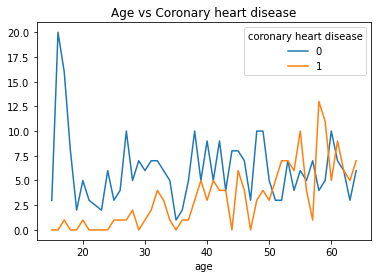

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# we have to see each features the crosstab with coronary heart disease
# age and coronary heart disease
small_df_cr=pd.crosstab(df['age'], df['coronary heart disease'])
small_df_cr.plot()
plt.title('Age vs Coronary heart disease')
plt.show()

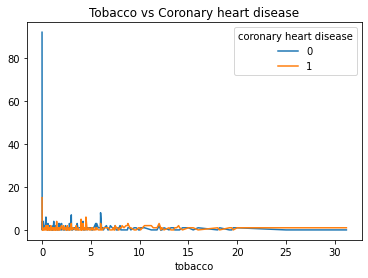

In [0]:
# tobacco and coronary heart disease
small_df_cr=pd.crosstab(df['tobacco'], df['coronary heart disease'])
small_df_cr.plot()
plt.title('Tobacco vs Coronary heart disease')
plt.show()

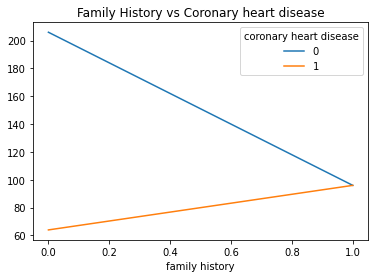

In [0]:
# family history and coronary heart disease
small_df_cr=pd.crosstab(df['family history'], df['coronary heart disease'])
small_df_cr.plot()
plt.title('Family History vs Coronary heart disease')
plt.show()

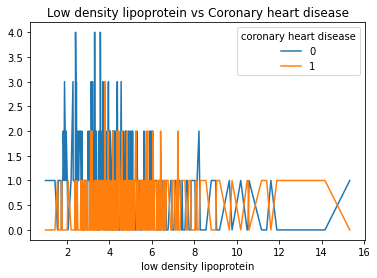

In [0]:
# low density lipoprotein and coronary heart disease
small_df_cr=pd.crosstab(df['low density lipoprotein'], df['coronary heart disease'])
small_df_cr.plot()
plt.title('Low density lipoprotein vs Coronary heart disease')
plt.show()

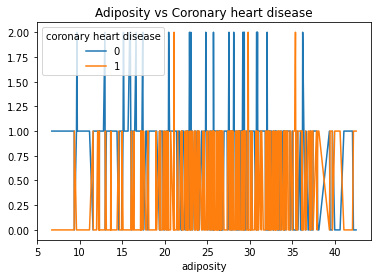

In [0]:
# adiposity and coronary heart disease
small_df_cr=pd.crosstab(df['adiposity'], df['coronary heart disease'])
small_df_cr.plot()
plt.title('Adiposity vs Coronary heart disease')
plt.show()

## Statistical tests and analysis

In [0]:
# Here we will test if there is equal chance of having colorary heart disease in
# each features I used 2 sample t-test and we will see how many of the sample data
# negative(0) or posetive(1)
small_df['coronary heart disease'].value_counts() 


0    302
1    160
Name: coronary heart disease, dtype: int64

In [0]:
chd_posetive = small_df[small_df['coronary heart disease']==1]
chd_posetive.head()


,coronary heart disease,age,tobacco,family history,low density lipoprotein,adiposity
0,1,52,12.00,1,5.73,23.11
1,1,63,0.01,0,4.41,28.61
3,1,58,7.50,1,6.41,38.03
4,1,49,13.60,1,3.50,27.78
7,1,58,4.08,1,4.59,14.60


In [0]:
chd_posetive.describe()

,coronary heart disease,age,tobacco,family history,low density lipoprotein,adiposity
count,160.0,160.000000,160.000000,160.000000,160.000000,160.000000
mean,1.0,50.293750,5.524875,0.600000,5.487938,28.120250
std,0.0,10.649119,5.565143,0.491436,2.225073,7.057996
min,1.0,17.000000,0.000000,0.000000,1.550000,9.390000
25%,1.0,42.750000,1.500000,0.000000,3.940000,23.462500
50%,1.0,53.000000,4.130000,1.000000,5.065000,28.405000
75%,1.0,59.000000,8.200000,1.000000,6.582500,33.587500
max,1.0,64.000000,31.200000,1.000000,14.160000,42.490000


In [0]:
chd_posetive['tobacco'] = np.where(chd_posetive['tobacco'] < 5.5, 0, chd_posetive['tobacco'])
chd_posetive['tobacco'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.00     100
12.00      3
6.00       3
8.80       3
8.75       2
8.20       2
8.60       2
11.20      2
14.00      2
7.50       2
10.50      2
9.00       1
6.60       1
8.08       1
7.28       1
7.77       1
13.02      1
20.00      1
5.50       1
15.00      1
18.00      1
7.40       1
8.00       1
6.75       1
15.50      1
10.00      1
11.79      1
13.80      1
9.10       1
19.20      1
6.30       1
19.45      1
11.40      1
6.80       1
12.30      1
31.20      1
8.40       1
14.10      1
7.60       1
9.90       1
13.60      1
12.16      1
8.14       1
6.40       1
25.01      1
5.60       1
27.40      1
12.20      1
Name: tobacco, dtype: int64

In [0]:
chd_posetive['low density lipoprotein'] = np.where(chd_posetive['low density lipoprotein'] < 2.6, 0, chd_posetive['low density lipoprotein'])
chd_posetive['low density lipoprotein'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.00    6
3.79    3
4.59    2
3.17    2
4.82    2
       ..
4.80    1
8.41    1
5.45    1
3.90    1
3.50    1
Name: low density lipoprotein, Length: 137, dtype: int64

In [0]:
chd_posetive['adiposity'] = np.where(chd_posetive['adiposity'] >= 30.0, 0, chd_posetive['adiposity'])
chd_posetive['adiposity'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.00     64
21.10     2
29.81     2
22.39     1
28.02     1
         ..
29.38     1
29.07     1
14.60     1
27.55     1
27.41     1
Name: adiposity, Length: 95, dtype: int64

In [0]:

chd_posetive['age'] = np.where(chd_posetive['age'] < 40, 0, chd_posetive['age'])
chd_posetive['age'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     28
58    13
59    11
55    10
61     9
53     7
64     7
52     7
45     6
54     6
62     6
60     5
63     5
51     5
41     5
42     4
43     4
49     4
46     4
56     4
48     3
50     3
40     3
57     1
Name: age, dtype: int64

In [0]:
chd_posetive['family history'].value_counts()


1    96
0    64
Name: family history, dtype: int64

In [0]:
chd_negative = small_df[small_df['coronary heart disease']==0]
chd_negative.head()

,coronary heart disease,age,tobacco,family history,low density lipoprotein,adiposity
2,0,46,0.08,1,3.48,32.28
5,0,45,6.20,1,6.47,36.21
6,0,38,4.05,0,3.38,16.20
8,0,29,0.00,1,3.83,19.40
12,0,17,0.00,0,1.88,10.05


In [0]:
chd_negative.describe()

,coronary heart disease,age,tobacco,family history,low density lipoprotein,adiposity
count,302.0,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.0,38.854305,2.634735,0.317881,4.344238,23.969106
std,0.0,14.882663,3.612095,0.466426,1.870444,7.772876
min,0.0,15.000000,0.000000,0.000000,0.980000,6.740000
25%,0.0,27.000000,0.000000,0.000000,3.057500,17.510000
50%,0.0,40.000000,1.035000,0.000000,3.980000,24.625000
75%,0.0,50.750000,4.200000,1.000000,5.287500,29.957500
max,0.0,64.000000,20.000000,1.000000,15.330000,42.060000


In [0]:
chd_negative['age'] = np.where(chd_negative['age'] < 40, 0, chd_negative['age'])
chd_negative['age'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     148
49     10
60     10
48     10
40      9
42      9
44      8
45      8
61      7
57      7
46      7
53      7
64      6
55      6
62      6
50      5
56      5
59      5
41      5
54      4
58      4
43      4
63      3
52      3
47      3
51      3
Name: age, dtype: int64

In [0]:
chd_negative['adiposity'] = np.where(chd_negative['adiposity'] < 30, 0, chd_negative['adiposity'])
chd_negative['adiposity'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.00     229
32.03      2
30.90      2
30.79      2
36.21      2
        ... 
32.38      1
33.67      1
35.54      1
31.33      1
37.83      1
Name: adiposity, Length: 69, dtype: int64

In [0]:
chd_negative['tobacco'] = np.where(chd_negative['tobacco'] < 2.6, 0, chd_negative['tobacco'])
chd_negative['tobacco'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.00    190
6.00      8
3.00      7
4.20      4
3.60      3
       ... 
5.16      1
3.80      1
7.90      1
9.45      1
3.90      1
Name: tobacco, Length: 80, dtype: int64

In [0]:
chd_negative['low density lipoprotein'] = np.where(chd_negative['low density lipoprotein'] < 2.6, 0, chd_negative['low density lipoprotein'])
chd_negative['low density lipoprotein'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.00    46
3.30     4
3.57     4
3.69     3
4.37     3
        ..
3.83     1
5.32     1
3.91     1
5.13     1
6.38     1
Name: low density lipoprotein, Length: 200, dtype: int64

In [0]:
chd_negative['family history'].value_counts()

0    206
1     96
Name: family history, dtype: int64

2 sample t-test on age coronary heart disease posetive more than coronary heart disease negative

1. Null Hypothhesis: coronary negative heart disease is  the same as  coronary heart disease posetive on age 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive  on age  
$H_0: \bar{x}_n = \bar{x}_p$ 
3. Confidence level: 95%

In [0]:
from scipy import stats
stats.ttest_ind(chd_negative['age'], chd_posetive['age'])

Ttest_indResult(statistic=-8.621496303728742, pvalue=1.0741818171806074e-16)

**Conclusion**: Given a t-statistic of -8.6, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on age. This suggests the alternative that they are not the same on age. From the t-statistics sign the average age for coronary heart disease posetive is bigger.

2 sample t-test on tobacco  coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on tobacco 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive  on tobacco  
$H_0: \bar{x}_n = \bar{x}_p$ 
3. Confidence level: 95%

In [0]:
# tobacco
stats.ttest_ind(chd_negative['tobacco'], chd_posetive['tobacco'])

Ttest_indResult(statistic=-6.737983717964519, pvalue=4.815842571605575e-11)

**Conclusion**: Given a t-statistic of -6.7, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on tobacco. This suggests the alternative that they are not the same on tobacco consumption. From the t-statistics sign the average tobacco consumption for coronary heart disease posetive is bigger.

2 sample t-test on family history  coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on family history 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive  on family history  
$H_0: \bar{x}_n = \bar{x}_p$ 
3. Confidence level: 95%

In [0]:
# family history
stats.ttest_ind(chd_negative['family history'], chd_posetive['family history'])

Ttest_indResult(statistic=-6.071288544960015, pvalue=2.6576285226962867e-09)

**Conclusion**: Given a t-statistic of -6.1, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on family history. This suggests the alternative that they are not the same on family history. From the t-statistics sign the average of family history for coronary heart disease posetive is bigger.

2 sample t-test low density lipoprotein  coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on low density lipoprotein
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive  on low density lipoprotein  
$H_0: \bar{x}_n = \bar{x}_p$ 
3. Confidence level: 95%

In [0]:
# low density lipoprotein
stats.ttest_ind(chd_negative['low density lipoprotein'], chd_posetive['low density lipoprotein'])

Ttest_indResult(statistic=-5.847802552547037, pvalue=9.457207912519723e-09)

**Conclusion**: Given a t-statistic of -5.8, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on low density lipoprotein. This suggests the alternative that they are not the same on low density lipoprotein. From the t-statistics sign the average of low density lipoprotein for coronary heart disease posetive is bigger.

2 sample t-test on adiposity  coronary heart disease posetive more than  coronary heart disease negative

1. Null Hypothhesis: coronary  heart disease negative is  the same as  coronary heart disease posetive on adiposity 
 $H_0: \bar{x}_n = \bar{x}_p$
2. Alternative Hypothesis:  coronary heart disease negative is  not the same as  coronary heart disease posetive  on adiposity  
$H_0: \bar{x}_n = \bar{x}_p$ 
3. Confidence level: 95%

In [0]:
# adiposity
stats.ttest_ind(chd_negative['adiposity'], chd_posetive['adiposity'])

Ttest_indResult(statistic=-5.635290062988449, pvalue=3.050507732724932e-08)

**Conclusion**: Given a t-statistic of -5.6, and p-value of 0, we reject the null hypothesis that coronary heart disease negative is the same as coronary heart disease posetive on adiposity. This suggests the alternative that they are not the same on adiposity. From the t-statistics sign the average of adiposity for coronary heart disease posetive is bigger.

In [0]:
df['age'] = np.where(df['age'] < 40, 0, df['age'])

df['age'] = np.where(df['age'] >= 40, 1, df['age'])
df['age'].value_counts()

1    286
0    176
Name: age, dtype: int64

In [0]:
chd_posetive_prop = pd.DataFrame({'age': [28,122], 'tobacco': [100,60], 'famhist': [64,96],
                                  'lowdenlipoprot': [6,154],'adiposity':[96,64]})
chd_posetive_prop


,age,tobacco,famhist,lowdenlipoprot,adiposity
0,28,100,64,6,96
1,122,60,96,154,64


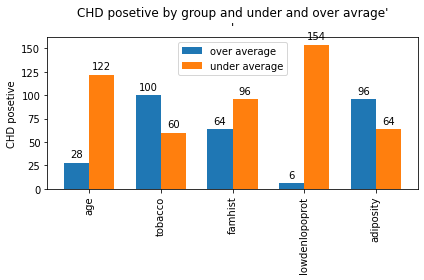

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['age', 'tobacco', 'famhist', 'lowdenlopoprot', 'adiposity']
chd_pve_under = [28, 100, 64, 6, 96]
chd_pve_over = [122, 60, 96, 154, 64]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, chd_pve_under, width, label='over average')
rects2 = ax.bar(x + width/2, chd_pve_over, width, label='under average')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CHD posetive')
ax.set_title("CHD posetive by group and under and over avrage'\n'")

ax.set_xticks(x)
ax.set_xticklabels(labels,rotation='vertical')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [0]:
chd_negative_prop = pd.DataFrame({'age': [148,154], 'tobacco': [190,112], 'famhist': [206,96],
                                  'lowdenlipoprot': [46,256],'adiposity':[229,73]})
chd_negative_prop

,age,tobacco,famhist,lowdenlipoprot,adiposity
0,148,190,206,46,229
1,154,112,96,256,73


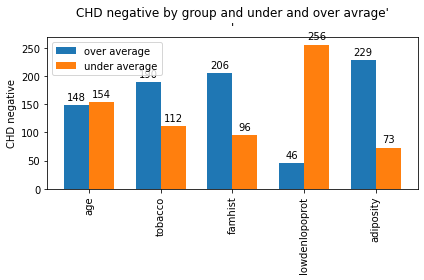

In [0]:

labels = ['age', 'tobacco', 'famhist', 'lowdenlopoprot', 'adiposity']
chd_nve_under = [148, 190, 206, 46, 229]
chd_nve_over = [154, 112, 96, 256, 73]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, chd_nve_under, width, label='over average')
rects2 = ax.bar(x + width/2, chd_nve_over, width, label='under average')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CHD negative')
ax.set_title("CHD negative by group and under and over avrage'\n'")

ax.set_xticks(x)
ax.set_xticklabels(labels,rotation='vertical')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [0]:
chd_total = chd_posetive_prop+chd_negative_prop
chd_total

,age,tobacco,famhist,lowdenlipoprot,adiposity
0,176,290,270,52,325
1,276,172,192,410,137


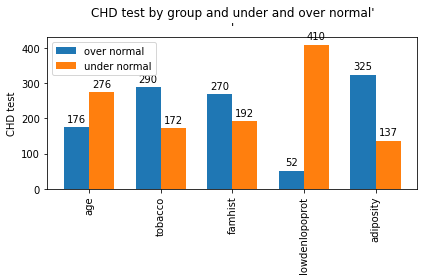

In [0]:

labels = ['age', 'tobacco', 'famhist', 'lowdenlopoprot', 'adiposity']
chd_under_normal = [176, 290, 270, 52, 325]
chd_over_normal = [276, 172, 192, 410, 137]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, chd_under_normal, width, label='over normal')
rects2 = ax.bar(x + width/2, chd_over_normal, width, label='under normal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CHD test')
ax.set_title("CHD test by group and under and over normal'\n'")

ax.set_xticks(x)
ax.set_xticklabels(labels,rotation='vertical')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Summary and Conclusion

From above we have seen that the data analysis and the visualization of the data set, we clearly see the distrbution of each feature with CHD, we see the table of a correlation for the data set. Depending on the result of the correlation table I take the first five high value of correlation coefficient of CHD and other risk factors. So, from nine risk factors of CHD we took five of them ('age', 'low density lipoprotein','family history', 'tobacco', 'adiposity') and create a new data set. According to our 2-sample t-test all the risk factors show the null hypothesis that is the average value of CHD negative is the same as the average value of CHD posetive is rejected for all five risk factors, which implies the average value of CHD negative is not the same as the average value of CHD posetive. On the other hand, the sign of the t-statistics shows as the average value for CHD posetive is greater than CHD neagative. The higher the t-statistics shows us the net difference between the means are high. From our t-test for five risk factors the t-statistics value of age and CHD is higher than others and also age and CHD has the higher correlation coefficient value than other risk factors. From the total 462 samples 38.1% are posetive for CHD test and the rest 61.9% are negative. For the risk factors most of the factors which are above the avarage or the normality they have the chance to have CHD, the bar graphs above for each factors will give us more estimate.   